# Logistic Regression
* Let us try binary classification with the below data

In [9]:
exam=[90,86,72,80,57,68,64,75]
grade=[1,1,1,1,0,0,0,0]

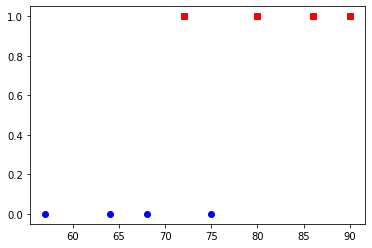

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(exam,[i if i==1 else None for i in grade],'rs')
plt.plot(exam,[i if i==0 else None for i in grade],'bo')

### Sigmoid Function
Let us fit the data with the sigmoid function:
$$ f(x)= \frac{1}{1+e^{-w x}}. $$

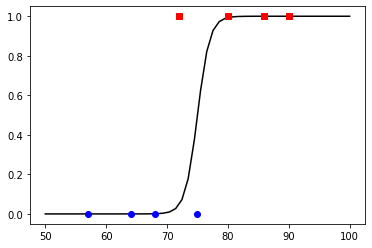

In [58]:
x=np.linspace(50,100,50)
def sig(x,w,b):
    return 1.0/(1+np.exp(-w*x+b))
plt.plot(x,sig(x,1,75),'k-')
plt.plot(exam,[i if i==1 else None for i in grade],'rs')
plt.plot(exam,[i if i==0 else None for i in grade],'bo')

### How to find the best fitted line?
#### Maximum Likelihood Estimation (MLE) + Gradient Descent Method (GD) 

개별 데이터들이 독립적이라고 가정하면 최대 가능도(maximum likelihood)는 다음처럼 주어진다.
$$ L(w)= \prod_{i} f_w(x_i)^{y_i} [1-f_w(x_i) ]^{1-y_i}, $$
여기에서 $f$는 모델 예측값, $y$는 실제 레이블을 의미한다. 위의 식을 살펴보면 만약 $y_i=1$이면 $f_w$이고
$y_i=0$이면 $(1-f_w)$로 주어지는 값임을 알 수 있다. 따라서 다음의 식을 최대화하는 $w$를 찾으면 
좋은 fitting을 구할 수 있다. 위의 식을 그대로 최대화해도 되지만 계산의 편의를 위해 $-\log$를 
취해서 log likelihood를 최소화하는 과정을 통해 $w$를 찾아보자.

log likelihood 함수는 다음처럼 주어진다.
$$
-\log L(w)= -\sum_i [ y_i \log f_w + (1-y) \log (1-f_w) ].$$
이 식을 cross entropy (CE) 혹은 log loss function 이라고 부른다. 이 함수가 최소가 되려면 미분값이 $0$이 되는 조건을 만족하면 해야 한다.
$$\begin{align}
-\frac{\partial \log L(w)}{\partial w} &= -\frac{\partial }{\partial w}  y_i \log f_w + (1-y_i) \log (1-f_w)  \\
&= -\frac{y_i }{f_w} \frac{\partial f_w}{\partial w} + \frac{1-y_i }{1-f_w} \frac{\partial f_w}{\partial w} \\
&= -\frac{y_i }{f_w} f_w(1-f_w)x_i + \frac{1-y_i }{1-f_w} f_w(1-f_w)x_i \\
&= -\frac{y_i }{f_w} f_w(1-f_w)x_i + \frac{1-y_i }{1-f_w} f_w(1-f_w)x_i \\
&= (f_w - y_i)x_i =0. \end{align}$$


아쉽게도 $w$를 해석적으로 구할 수 있는 방법은 없지만 위의 결과와 경사하강법(Gradient Descent method)를 활용하면 손쉽게 최소값을 찾을 수 있다. 즉 다음의 식을 따라 오차(cross entropy)를 줄이는 방향으로 $w$의 값을 바꾸면서 오차가 최소값까지 도달할 때까지 위의 계산을 반복한다. 
$$\begin{align} w&=w- \eta \frac{\partial }{\partial w}[-\log L(w)]\\
&=w+\eta \sum_i (y_i - f_w )x_i \end{align}$$

### Scikit-learn LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
X=[[i] for i in exam]
y=grade
log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
log_reg.coef_ , log_reg.intercept_

(array([[0.32895009]]), array([-24.25957919]))

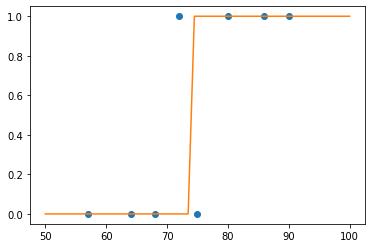

In [90]:
x=[[i] for i in np.linspace(50,100,50)]
plt.plot(X,y,'o')
plt.plot(x,log_reg.predict(x))

In [92]:
log_reg.score(X, y)

0.75

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, log_reg.predict(X))
# read carefully!
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

array([[3, 1],
       [1, 3]])

* You can improve your model by setting and adjusting parameters. Try it!

### Softmax Regression (Multinomial Logistic Regression)
* 소프트맥스 회귀 혹은 다중로지스틱 회귀는 딥러닝을 배울 때 함께 소개하도록 하겠습니다.